<a href="https://colab.research.google.com/github/gowtham-dd/Project_3-HousePrediction/blob/main/proj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding and Exploration

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [2]:
# Step 3: Fetch the dataset
dataset = fetch_ucirepo(id=235)

# Inspect what was fetched
print("Dataset Features:", dataset.data.features)
print("Dataset Targets:", dataset.data.targets)


/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Dataset Features:                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.8

In [3]:
import pandas as pd
import numpy as np

# Load from UCI directly (already in your dataset as DataFrame)
data = dataset.data.features

# Replace missing values marked as '?' and convert to numeric
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data.set_index('Datetime', inplace=True)

# Drop original Date and Time columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Check cleaned data
print(data.head())


                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

## Data Understanding and Exploration

(2049280, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75

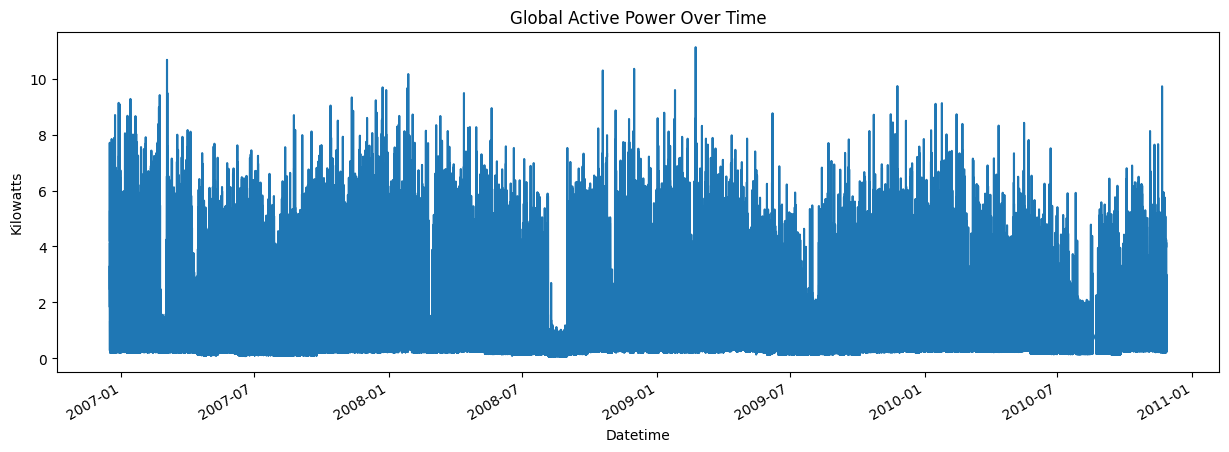

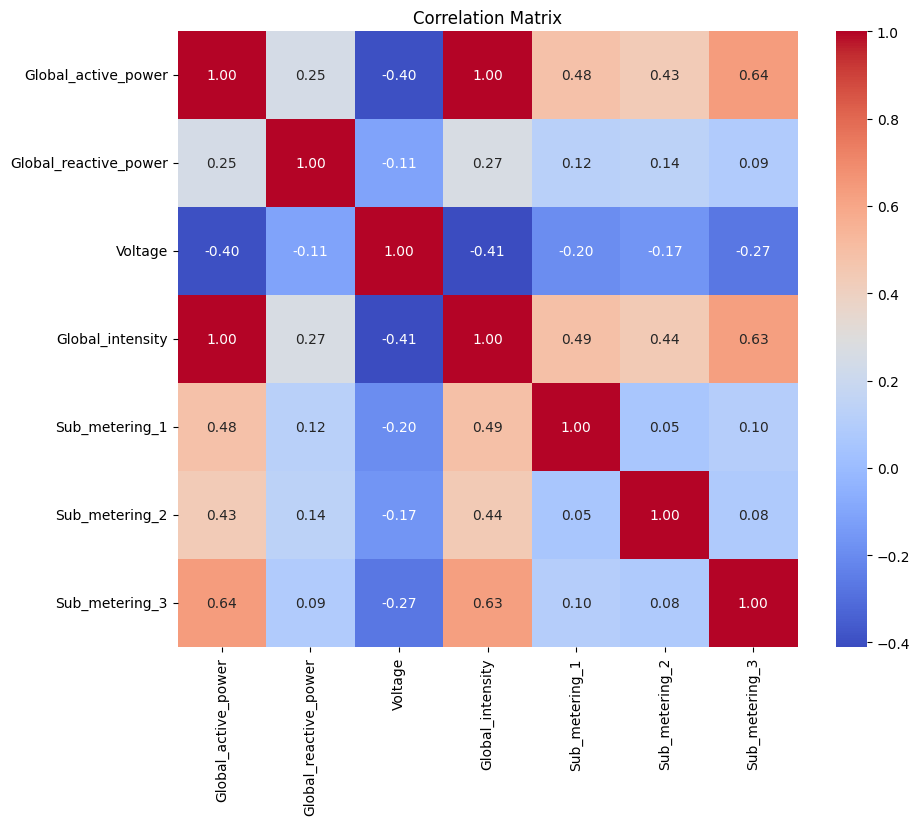

In [4]:
# Basic info
print(data.shape)
print(data.info())
print(data.describe())

# Check for missing values
missing = data.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Plot energy usage over time
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
data['Global_active_power'].plot()
plt.title('Global Active Power Over Time')
plt.ylabel('Kilowatts')
plt.show()

# Correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Data Preprocessing

In [5]:
# Already handled missing values earlier

# Feature extraction from datetime
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday
data['Month'] = data.index.month

# Rolling average of past 3 hours (you can adjust)
data['RollingAvg_3hr'] = data['Global_active_power'].rolling(window=3).mean()
data.dropna(inplace=True)

# Define X and y again after new features
target = 'Global_active_power'
X = data.drop(columns=[target])
y = data[target]


## Feature Engineering

In [6]:
# Feature: Is Peak Hour (6PM–9PM)
data['Is_Peak'] = data['Hour'].apply(lambda x: 1 if 18 <= x <= 21 else 0)

# Feature: Is Weekend
data['Is_Weekend'] = data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Lag feature (previous hour consumption)
data['Lag_1hr'] = data['Global_active_power'].shift(1)
data.dropna(inplace=True)

# Redefine features and target
X = data.drop(columns=['Global_active_power'])
y = data['Global_active_power']


## Model Selection

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'Linear Regression': LinearRegression(),
    #'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
}

results = []

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append((name, mae, rmse, r2))

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(results_df.sort_values(by="RMSE"))


               Model       MAE      RMSE        R²
3      MLP Regressor  0.015821  0.025696  0.999412
1  Gradient Boosting  0.018933  0.031883  0.999094
0  Linear Regression  0.025158  0.039649  0.998599
2                KNN  0.037319  0.086674  0.993307


## Model Evaluation

In [ ]:
best_model = GradientBoostingRegressor(n_estimators=100)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(15, 5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Global Active Power")
plt.xlabel("Time Index")
plt.ylabel("Global Active Power")
plt.show()
